## Load sorting data 

- run a spike sorted (we ran kilosort)
- run phy to manually curate the dataset
- open the data in this notebook



In [3]:
from analysis_helpers import *
import pylab as plt

%matplotlib qt

folder = r'E:/CSHL/pita_g0/ks25'


spike_times_samples,spike_clusters,spike_amplitudes,spike_positions,templates_raw,templates_position,cluster_groups = load_phy_folder(folder)

In [4]:
# the spikes need to be converted to time (they are in samples now)
# we do this by dividing by the sampling rate
# lets load the sampling rate from the file we saved earlier

syncs = glob(pjoin(folder,'..','experiment_syncs.h5'))[0]
import h5py as h5

with h5.File(syncs,'r') as fd:
    srate = fd['sampling_rate'][()]
    visual_onsets = fd['visual_sync_s'][()]
    opto_onsets = fd['opto_sync_s'][()]
spike_times = spike_times_samples/srate

### Plot a raster of spike times versus depth

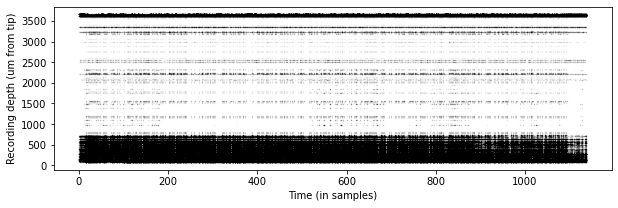

In [6]:
%matplotlib inline
# plot the spiketimes versus the spike positions
plt.figure(figsize = [10,3])
plt.plot(spike_times,spike_positions[:,1],'.k',markersize = 0.5,alpha = 0.1)
plt.ylabel('Recording depth (um from tip)')
plt.xlabel('Time (in samples)');

#### In this recording we only inserted the probe 775 microns, lets look at the spikes only  there

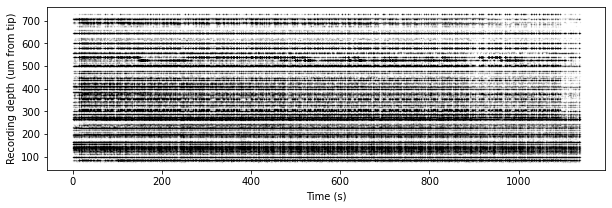

In [7]:
%matplotlib inline

selection  = spike_positions[:,1]<775

plt.figure(figsize = [10,3])
plt.plot(spike_times[selection],spike_positions[selection,1],'.k',markersize = 0.5,alpha = 0.1)
plt.ylabel('Recording depth (um from tip)')
plt.xlabel('Time (s)');


(100.0, 130.0)

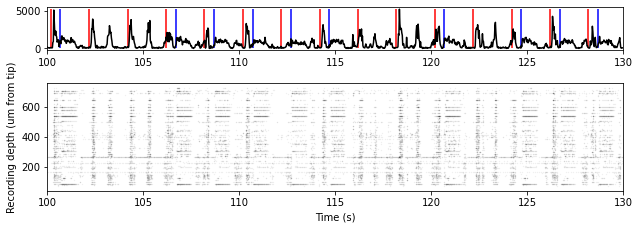

In [8]:
# lets now plot the population average (we basically need to just count spikes in a window)
binsize = 0.025 # lets use a 10ms binsize
edges = np.arange(0,np.max(spike_times),binsize)
%matplotlib qt
selection  = spike_positions[:,1]<775

pop_rate,_ = np.histogram(spike_times[selection],edges)
pop_rate = pop_rate/binsize
pop_rate_time = edges[:-1]+np.diff(edges[:2])/2

fig = plt.figure(figsize = [10,3])
ax = fig.add_axes([0.1,0.1,0.8,0.5])
# plot the "drift" rastermap
plt.plot(spike_times[selection],spike_positions[selection,1],'.k',markersize = 0.5,alpha = 0.1)
plt.ylabel('Recording depth (um from tip)')
plt.xlabel('Time (s)');
# plot the population rate
ax = fig.add_axes([0.1,0.75,0.8,0.2],sharex = ax)
plt.plot(pop_rate_time,pop_rate,'k')
# plot the stim onsets
plt.vlines(opto_onsets,0,np.max(pop_rate),color='blue')
plt.vlines(visual_onsets,0,np.max(pop_rate),color='red')
plt.xlim([100,130])

#### Some clusters might be noise, lets select the clusters that are selected as good


(100.0, 130.0)

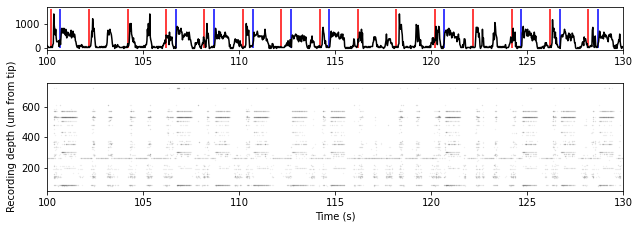

In [10]:
cluster_ids = cluster_groups.cluster_id[cluster_groups.group == 'good'].values
selection = np.isin(spike_clusters,cluster_ids)

binsize = 0.025 # lets use a 10ms binsize
edges = np.arange(0,np.max(spike_times),binsize)

pop_rate,_ = np.histogram(spike_times[selection],edges)
pop_rate = pop_rate/binsize
pop_rate_time = edges[:-1]+np.diff(edges[:2])/2

fig = plt.figure(figsize = [10,3])
ax = fig.add_axes([0.1,0.1,0.8,0.5])
# plot the "drift" rastermap
plt.plot(spike_times[selection],spike_positions[selection,1],'.k',markersize = 0.5,alpha = 0.1)
plt.ylabel('Recording depth (um from tip)')
plt.xlabel('Time (s)');
# plot the population rate
ax = fig.add_axes([0.1,0.75,0.8,0.2],sharex = ax)
plt.plot(pop_rate_time,pop_rate,'k')
# plot the stim onsets
plt.vlines(opto_onsets,0,np.max(pop_rate),color='blue')
plt.vlines(visual_onsets,0,np.max(pop_rate),color='red')
plt.xlim([100,130])
